In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train_small.csv')
df.head()

,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,...,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
0,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,3625,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11622,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11826,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,22824,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,37581,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [3]:
df.tail()

,search_id,timestamp,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,...,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
2380552,665573,2013-03-30 16:39:40,5,219,NaN,NaN,219,117267,4,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2380553,665573,2013-03-30 16:39:40,5,219,NaN,NaN,219,125075,4,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2380554,665573,2013-03-30 16:39:40,5,219,NaN,NaN,219,127402,5,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2380555,665573,2013-03-30 16:39:40,5,219,NaN,NaN,219,128251,3,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2380556,665573,2013-03-30 16:39:40,5,219,NaN,NaN,219,135414,3,4.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0,NaN,0


In [4]:
df.dtypes

search_id                           int64
timestamp                          object
site_id                             int64
user_country_id                     int64
user_hist_stars                   float64
user_hist_paid                    float64
listing_country_id                  int64
listing_id                          int64
listing_stars                       int64
listing_review_score              float64
is_brand                            int64
location_score1                   float64
location_score2                   float64
log_historical_price              float64
listing_position                    int64
price_usd                         float64
has_promotion                       int64
destination_id                      int64
length_of_stay                      int64
booking_window                      int64
num_adults                          int64
num_kids                            int64
num_rooms                           int64
stay_on_saturday                  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380557 entries, 0 to 2380556
Data columns (total 54 columns):
search_id                         int64
timestamp                         object
site_id                           int64
user_country_id                   int64
user_hist_stars                   float64
user_hist_paid                    float64
listing_country_id                int64
listing_id                        int64
listing_stars                     int64
listing_review_score              float64
is_brand                          int64
location_score1                   float64
location_score2                   float64
log_historical_price              float64
listing_position                  int64
price_usd                         float64
has_promotion                     int64
destination_id                    int64
length_of_stay                    int64
booking_window                    int64
num_adults                        int64
num_kids                        

In [6]:
df.describe()

,search_id,site_id,user_country_id,user_hist_stars,user_hist_paid,listing_country_id,listing_id,listing_stars,listing_review_score,is_brand,...,competitor6_price_percent_diff,competitor7_rate,competitor7_has_availability,competitor7_price_percent_diff,competitor8_rate,competitor8_has_availability,competitor8_price_percent_diff,clicked,booking_value,booked
count,2.380557e+06,2.380557e+06,2.380557e+06,122780.000000,123494.000000,2.380557e+06,2.380557e+06,2.380557e+06,2.377071e+06,2.380557e+06,...,47961.000000,154468.000000,174850.000000,67832.000000,913495.000000,947465.000000,292700.000000,2.380557e+06,66388.000000,2.380557e+06
mean,3.337016e+05,9.970224e+00,1.754588e+02,3.382814,178.094940,1.739159e+02,7.008190e+04,3.180607e+00,3.779416e+00,6.346880e-01,...,17.196243,0.147856,0.083180,20.109919,-0.060010,0.009595,21.731093,4.456688e-02,383.229069,2.788759e-02
std,1.923719e+05,7.667827e+00,6.585934e+01,0.694562,108.568025,6.832483e+01,4.060398e+04,1.052086e+00,1.049727e+00,4.815176e-01,...,29.536009,0.579293,0.317575,63.110961,0.469455,0.203876,800.608005,2.063509e-01,527.019882,1.646508e-01
min,4.000000e+00,1.000000e+00,1.000000e+00,1.500000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,1.674260e+05,5.000000e+00,1.000000e+02,2.950000,111.090000,1.000000e+02,3.502800e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000,0.000000,7.000000,0.000000e+00,124.150000,0.000000e+00
50%,3.332720e+05,5.000000e+00,2.190000e+02,3.450000,152.620000,2.190000e+02,6.961500e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000,0.000000,11.000000,0.000000e+00,219.185000,0.000000e+00
75%,5.007050e+05,1.400000e+01,2.190000e+02,3.950000,215.950000,2.190000e+02,1.051420e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000,0.000000,17.000000,0.000000e+00,432.125000,0.000000e+00
max,6.655730e+05,3.400000e+01,2.310000e+02,5.000000,1507.120000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1363.000000,1.000000,1.000000,7951.000000,1.000000,1.000000,130000.000000,1.000000e+00,20238.720000,1.000000e+00


In [7]:
df.isna().sum()

search_id                               0
timestamp                               0
site_id                                 0
user_country_id                         0
user_hist_stars                   2257777
user_hist_paid                    2257063
listing_country_id                      0
listing_id                              0
listing_stars                           0
listing_review_score                 3486
is_brand                                0
location_score1                         0
location_score2                    525992
log_historical_price                    0
listing_position                        0
price_usd                               0
has_promotion                           0
destination_id                          0
length_of_stay                          0
booking_window                          0
num_adults                              0
num_kids                                0
num_rooms                               0
stay_on_saturday                  

In [8]:
df.drop(['user_hist_stars','user_hist_paid','log_click_proportion','competitor1_rate','competitor1_has_availability',
        'competitor1_price_percent_diff','competitor2_rate','competitor2_has_availability','competitor2_price_percent_diff',
        'competitor3_rate','competitor3_has_availability','competitor3_price_percent_diff','competitor4_rate',
        'competitor4_has_availability','competitor4_price_percent_diff','competitor5_rate','competitor5_has_availability',
        'competitor5_price_percent_diff','competitor6_rate','competitor6_has_availability','competitor6_price_percent_diff',
        'competitor7_rate','competitor7_has_availability','competitor7_price_percent_diff','competitor8_rate',
        'competitor8_has_availability','competitor8_price_percent_diff','booking_value'], axis=1, inplace=True)

In [9]:
df.isna().sum()

search_id                    0
timestamp                    0
site_id                      0
user_country_id              0
listing_country_id           0
listing_id                   0
listing_stars                0
listing_review_score      3486
is_brand                     0
location_score1              0
location_score2         525992
log_historical_price         0
listing_position             0
price_usd                    0
has_promotion                0
destination_id               0
length_of_stay               0
booking_window               0
num_adults                   0
num_kids                     0
num_rooms                    0
stay_on_saturday             0
distance_to_dest        770336
random_sort                  0
clicked                      0
booked                       0
dtype: int64

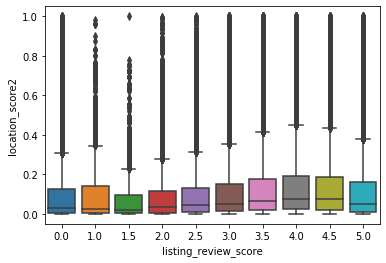

In [10]:
sns.boxplot('listing_review_score','location_score2', data=df)

In [11]:
mean=df['listing_review_score'].mean()

In [12]:
df['listing_review_score'].replace(np.nan, mean, inplace=True)

In [13]:
df['listing_review_score'].isna().sum()

0

In [14]:
mean1=df['location_score2'].mean()

df['location_score2'].replace(np.nan, mean1, inplace=True)

In [15]:
df['location_score2'].isna().sum()

0

In [16]:
mean2=df['distance_to_dest'].mean()

df['distance_to_dest'].replace(np.nan, mean2, inplace=True)

In [17]:
df['distance_to_dest'].isna().sum()

0

In [18]:
df.isna().sum()

search_id               0
timestamp               0
site_id                 0
user_country_id         0
listing_country_id      0
listing_id              0
listing_stars           0
listing_review_score    0
is_brand                0
location_score1         0
location_score2         0
log_historical_price    0
listing_position        0
price_usd               0
has_promotion           0
destination_id          0
length_of_stay          0
booking_window          0
num_adults              0
num_kids                0
num_rooms               0
stay_on_saturday        0
distance_to_dest        0
random_sort             0
clicked                 0
booked                  0
dtype: int64

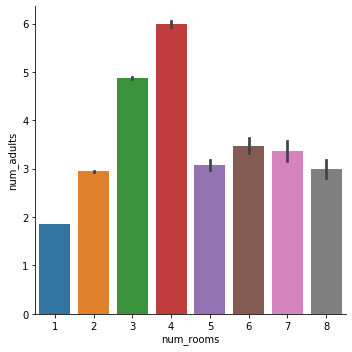

In [19]:
sns.catplot('num_rooms','num_adults',data=df,kind='bar')

(0, 1.0500465562708694)

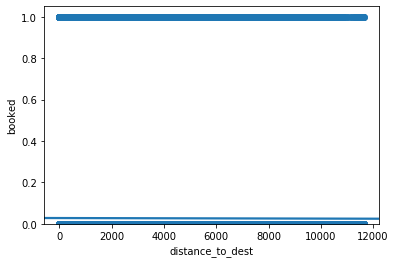

In [20]:
sns.regplot('distance_to_dest','booked',data=df)
plt.ylim(0,)

(0, 1.0500465562708694)

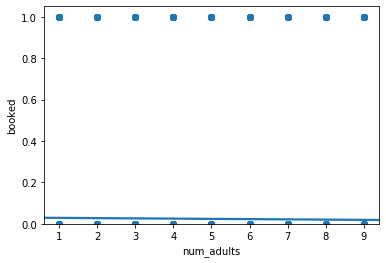

In [21]:
sns.regplot('num_adults','booked',data=df)
plt.ylim(0,)

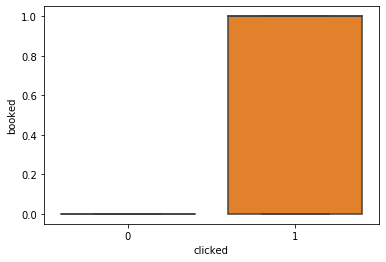

In [22]:
sns.boxplot('clicked','booked',data=df)

In [23]:
df.clicked.value_counts()

0    2274463
1     106094
Name: clicked, dtype: int64

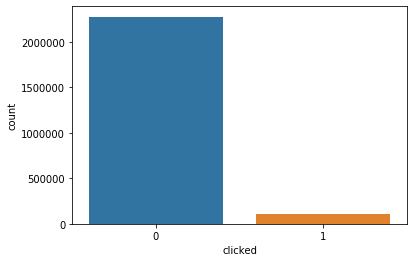

In [24]:
sns.countplot(df['clicked'])

In [25]:
df.booked.value_counts()

0    2314169
1      66388
Name: booked, dtype: int64

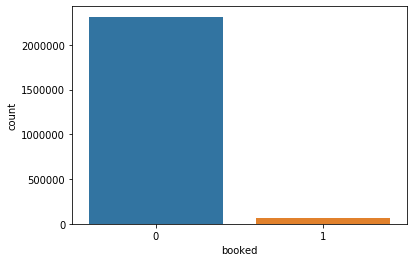

In [26]:
sns.countplot(df['booked'])

In [27]:
df.timestamp=pd.to_datetime(df['timestamp'])

In [28]:
df.timestamp=df.timestamp.map(dt.datetime.toordinal)

In [29]:
df_majority=df[df.booked==0]
df_minority=df[df.booked==1]

df_minority_unsample=resample(df_minority, replace=True, n_samples=2314169)

df_sample=pd.concat([df_majority, df_minority_unsample])
df_sample.booked.value_counts()

1    2314169
0    2314169
Name: booked, dtype: int64

In [30]:
df.columns

Index(['search_id', 'timestamp', 'site_id', 'user_country_id',
       'listing_country_id', 'listing_id', 'listing_stars',
       'listing_review_score', 'is_brand', 'location_score1',
       'location_score2', 'log_historical_price', 'listing_position',
       'price_usd', 'has_promotion', 'destination_id', 'length_of_stay',
       'booking_window', 'num_adults', 'num_kids', 'num_rooms',
       'stay_on_saturday', 'distance_to_dest', 'random_sort', 'clicked',
       'booked'],
      dtype='object')

In [31]:
x=df_sample.drop('booked', axis=1)
y=df_sample['booked']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.25, random_state=42)

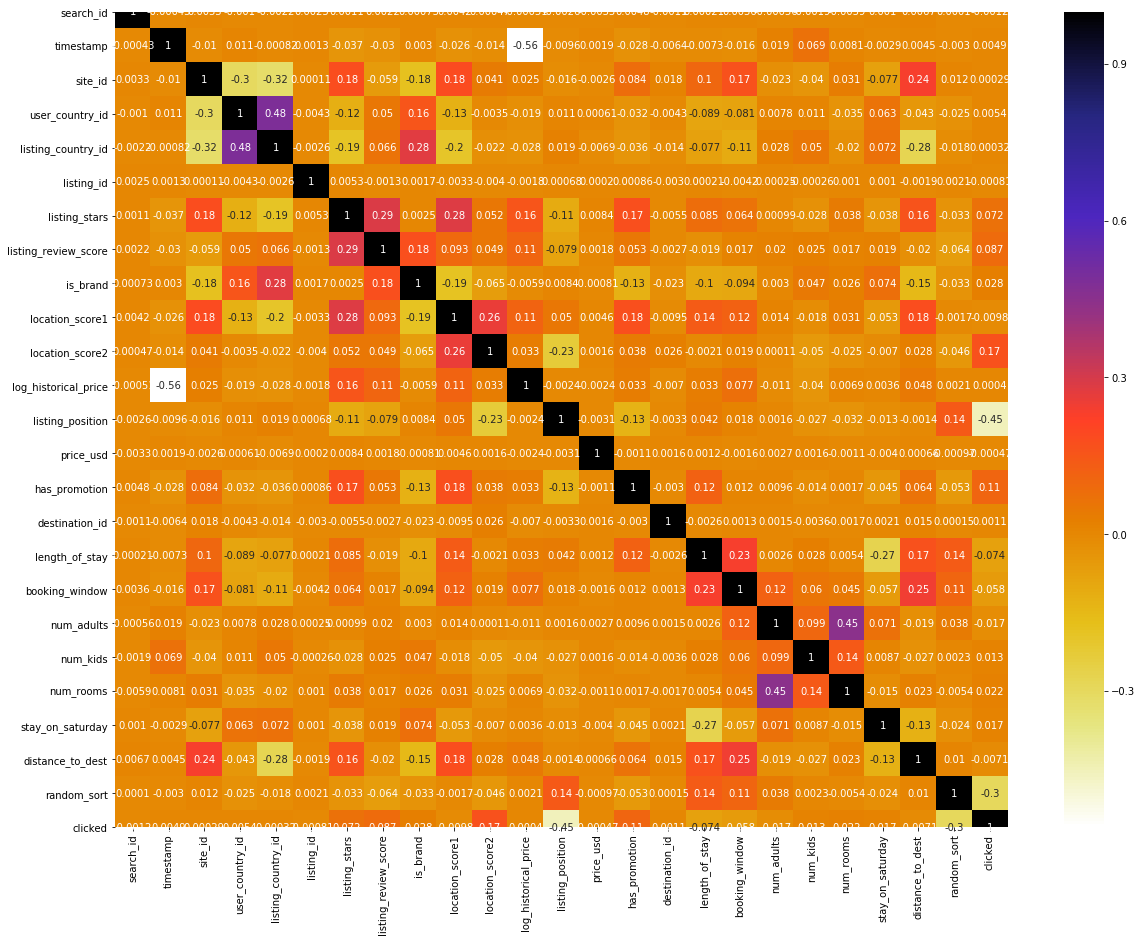

In [33]:
corr=x_train.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [34]:
def correlation(dataset, threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [35]:
corr_features = correlation(x_train, 0.8)
len(set(corr_features))

0

In [36]:
lg,gnb,knn,dtc,svc=LogisticRegression(),GaussianNB(),KNeighborsClassifier(),DecisionTreeClassifier(),SVC()

In [37]:
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)

print(accuracy_score(y_test, predlg))
print(confusion_matrix(y_test, predlg))
print(classification_report(y_test, predlg))

0.9914448808860196
[[567481   9892]
 [     7 579705]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    577373
           1       0.98      1.00      0.99    579712

    accuracy                           0.99   1157085
   macro avg       0.99      0.99      0.99   1157085
weighted avg       0.99      0.99      0.99   1157085



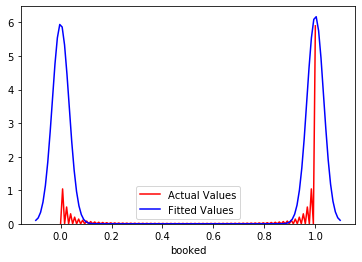

In [41]:
ax1=sns.distplot(df['booked'], hist=False, color='r', label='Actual Values')
sns.distplot(predlg, hist=False, color='b', label='Fitted Values', ax=ax1)

In [38]:
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))

0.946633134125842
[[515623  61750]
 [     0 579712]]
              precision    recall  f1-score   support

           0       1.00      0.89      0.94    577373
           1       0.90      1.00      0.95    579712

    accuracy                           0.95   1157085
   macro avg       0.95      0.95      0.95   1157085
weighted avg       0.95      0.95      0.95   1157085



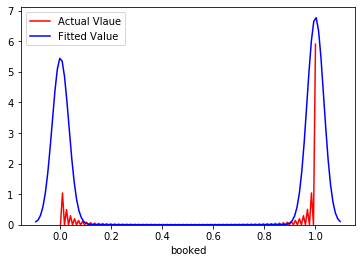

In [43]:
ax2=sns.distplot(df['booked'], hist=False, color='r', label='Actual Vlaue')
sns.distplot(predknn, hist=False, color='b', label='Fitted Value', ax=ax2)

In [39]:
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)

print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.9974582679751272
[[574432   2941]
 [     0 579712]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    577373
           1       0.99      1.00      1.00    579712

    accuracy                           1.00   1157085
   macro avg       1.00      1.00      1.00   1157085
weighted avg       1.00      1.00      1.00   1157085



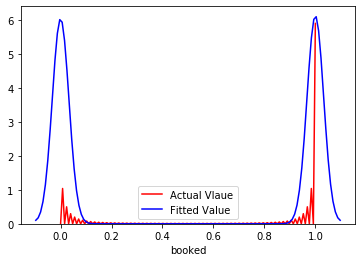

In [44]:
ax3=sns.distplot(df['booked'], hist=False, color='r', label='Actual Vlaue')
sns.distplot(preddtc, hist=False, color='b', label='Fitted Value', ax=ax3)

In [40]:
gnb.fit(x_train, y_train)
pregnb=gnb.predict(x_test)

print(accuracy_score(y_test, pregnb))
print(confusion_matrix(y_test, pregnb))
print(classification_report(y_test, pregnb))

0.6671566911678918
[[274945 302428]
 [ 82700 497012]]
              precision    recall  f1-score   support

           0       0.77      0.48      0.59    577373
           1       0.62      0.86      0.72    579712

    accuracy                           0.67   1157085
   macro avg       0.70      0.67      0.65   1157085
weighted avg       0.70      0.67      0.65   1157085



In [46]:
y_prob=dtc.predict_proba(x_test)[:,1]
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,y_prob)
roc_auc=auc(false_positive_rate,true_positive_rate)
roc_auc

0.9974531195604921

In [47]:
def plot_roc(roc_auc):
    plt.figure(figsize=(8,8))
    plt.title('Area coverd by this telecome company')
    plt.plot(false_positive_rate,true_positive_rate,color='red',label='AUC= %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')

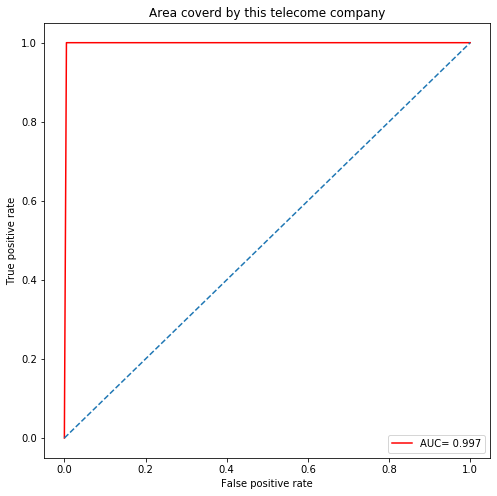

In [48]:
plot_roc(roc_auc)

In [49]:
from sklearn.externals import joblib

In [50]:
joblib.dump(dtc, 'OTA_File.obj')

['OTA_File.obj']